In [6]:
from time import sleep
import pandas as pd
import tkinter as tk
import requests
import numpy as np

import pyautogui

DisplayConnectionError: Can't connect to display ":0": b'No protocol specified\n'

In [7]:
def run_query(query):
    response = requests.post('https://api.tarkov.dev/graphql', json={'query': query})
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(response.status_code, query))

# lists all items
query_all_items_prices = """
{
    items {
        shortName
        id
        width
        height
        avg24hPrice
        changeLast48hPercent
        basePrice
        sellFor {
            price
            source
        }
    }
}
"""

def getAllItemsPrices():
    result = run_query(query_all_items_prices)
    #result = run_query(water_query)
    return result['data']['items']

In [8]:
path_data = './data/'

In [9]:
def items_dict_to_df(all_items):
    all_items_df = pd.DataFrame(columns=['name', 'id', 'width', 'height', 'icon_width', 'icon_height', 'features', 'fleaMarket', 'flea_avg48', 'flea_ch48percent', 'prapor', 'therapist', 'fence', 'skier', 'peacekeeper', 'mechanic', 'ragman', 'jaeger', 'basePrice'], index=range(len(all_items)))

    # iterate over all items
    for index in range(len(all_items)):
        all_items_df.iloc[index]['name'] = all_items[index].get('shortName')
        all_items_df.iloc[index]['id'] = all_items[index].get('id')
        all_items_df.iloc[index]['width'] = all_items[index].get('width')
        all_items_df.iloc[index]['height'] = all_items[index].get('height')
        all_items_df.iloc[index]['flea_avg48'] = all_items[index].get('avg24hPrice')
        all_items_df.iloc[index]['flea_ch48percent'] = all_items[index].get('changeLast48hPercent')
        all_items_df.iloc[index]['basePrice'] = all_items[index].get('basePrice')

        # iterate over all traders that can buy the item
        for offer in all_items[index].get('sellFor'):
            trader = offer.get('source')
            price  = offer.get('price')
            all_items_df.iloc[index][trader] = price
    
    return all_items_df


In [10]:
# create the items dataframe
all_items_dict = getAllItemsPrices()

In [11]:
all_items_df   = items_dict_to_df(all_items_dict)

In [13]:
# save dataframe as csv
all_items_df.to_csv('../../' + path_data + 'all_items.csv', index=False)

In [15]:
# load dataframe from csv
all_items_df = pd.read_csv('../../' + path_data + 'all_items.csv')

In [16]:
all_items_df

,name,id,width,height,icon_width,icon_height,features,fleaMarket,flea_avg48,flea_ch48percent,prapor,therapist,fence,skier,peacekeeper,mechanic,ragman,jaeger,basePrice
0,M4A1,5447a9cd4bdc2dbd208b4567,1,1,NaN,NaN,NaN,49995.0,76102,-51.03,9198.0,NaN,7358.0,NaN,83.0,10302.0,NaN,NaN,18397
1,M855,5447ac644bdc2d6c208b4567,1,1,NaN,NaN,NaN,2000.0,0,0.00,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN,1000
2,Factory,5448ba0b4bdc2d02308b456c,1,1,NaN,NaN,NaN,88000.0,87753,8.61,25000.0,31500.0,NaN,NaN,NaN,NaN,NaN,NaN,50000
3,PM,5448bd6b4bdc2dfc2f8b4569,2,1,NaN,NaN,NaN,5000.0,7122,-15.80,2548.0,NaN,2038.0,NaN,23.0,2854.0,NaN,NaN,5097
4,RGD-5,5448be9a4bdc2dfd2f8b456a,1,1,NaN,NaN,NaN,10420.0,13492,-4.76,3615.0,NaN,2892.0,3542.0,NaN,NaN,NaN,NaN,7230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,Batwolf,62a61c988ec41a51b34758d5,2,1,NaN,NaN,NaN,23000.0,26425,0.50,NaN,NaN,7200.0,8820.0,81.0,NaN,11160.0,NaN,18000
2719,Barrack,62a9cb937377a65d7b070cef,1,1,NaN,NaN,NaN,33330.0,34076,-23.68,20000.0,25200.0,NaN,NaN,NaN,NaN,NaN,NaN,40000
2720,Dogtag,customdogtags12345678910,1,1,NaN,NaN,NaN,NaN,0,NaN,300.0,378.0,240.0,294.0,NaN,NaN,NaN,NaN,600
2721,Glock 17 PS9,glock17ps900000000000001,2,1,NaN,NaN,NaN,NaN,0,0.00,29554.0,NaN,23643.0,NaN,266.0,33100.0,NaN,NaN,59108


In [26]:
item

name                               6P20 0-20
id                  5649aa744bdc2ded0b8b457e
width                                      1
height                                     1
icon_width                               NaN
icon_height                              NaN
features                                 NaN
fleaMarket                              3000
flea_avg48                              6700
flea_ch48percent                      -41.16
prapor                                   NaN
therapist                                NaN
fence                                    277
skier                                    340
peacekeeper                                3
mechanic                                 388
ragman                                   NaN
jaeger                                   NaN
Name: 100, dtype: object

In [29]:
item = all_items_df.loc[100]
price_traders = item.loc['prapor':'jaeger']
price_max = np.nanmax(price_traders)
trader = np.nanargmax(price_traders)
trader

5

In [ ]:
# all_items_df

In [ ]:
# all_items_dict

## Pyautogui and keyboard

In [29]:
import keyboard
from time import sleep
import pyautogui
from PIL import Image, ImageStat

In [30]:
def get_image_around_mouse(position):
    slot_size = 64 * 1.2
    x = (int) (position[0] - 0.5*slot_size)
    y = (int) (position[1] - 0.5*slot_size)
    screenshot = pyautogui.screenshot(region=(x,y,slot_size,slot_size))
    screenshot = np.array(screenshot)
    return screenshot

def predict_item_under_mouse():
    mouse_pos = pyautogui.position()
    item = get_image_around_mouse(mouse_pos)
    prediction,distance = predict_icon(item)
    

Mouse Position: Point(x=2880, y=1263)


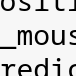

In [31]:
img = None
while True:
    if keyboard.is_pressed('8'):
        mouse_pos = pyautogui.position()
        print(f"Mouse Position: {mouse_pos}")
        img = get_image_around_mouse(mouse_pos)
        break
    if keyboard.is_pressed('escape'):
        break
        
Image.fromarray(img)